In [12]:
%pylab inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib

In [13]:
PATH_TO_DATA = os.getcwd()
PATH_TO_DATA = PATH_TO_DATA[:-PATH_TO_DATA[::-1].find("/")]
#PATH_TO_DATA += "data/6-months/"
PATH_TO_DATA += "data/2019-2months-1d/"
btc_df = pd.read_csv(PATH_TO_DATA + "Binance_BTCUSDT_1D_1 Sep, 2018-1 Mar, 2019.csv", sep='\t')

In [14]:
def candles_view(open, high, low, close, volume, hours):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    k = 24/hours

    r_width = 0.8 / k
    periods = range(len(open))
    for timestamp in periods:
        r_height = abs(open[timestamp] - close[timestamp]) + 0.1
        r_x = timestamp/k - r_width/2.0
        r_y = min(open[timestamp], close[timestamp])
        if (open[timestamp] > close[timestamp]):
            ax.add_patch(patches.Rectangle((r_x, r_y), r_width, r_height, facecolor='r'))
            plt.plot([timestamp/k, timestamp/k], [low[timestamp], high[timestamp]], 'r')
        else:
            ax.add_patch(patches.Rectangle((r_x, r_y), r_width, r_height, facecolor='g'))
            plt.plot([timestamp/k, timestamp/k], [low[timestamp], high[timestamp]], 'g')

    #mng = plt.get_current_fig_manager()
    #mng.resize(*mng.window.maxsize())
    plt.show()

<Figure size 936x576 with 0 Axes>

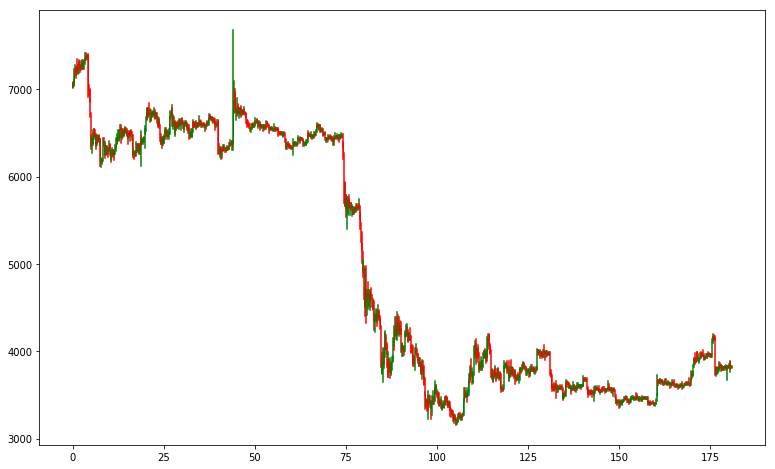

In [16]:
#%matplotlib qt
plt.figure(figsize(13,8))
candles_view(btc_df["open"].values, 
             btc_df["high"].values, 
             btc_df["low"].values, 
             btc_df["close"].values, 
             btc_df["volume"].values, 4)